<a href="https://colab.research.google.com/github/embee430/Data-Projects/blob/main/Car%20price%20prediction%20(Model%20Development).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PREDICTING CAR PRICE BASED ON SAMPLE DATA
#will develop several models that will predict the price of the car using the variables or features. 
#This is just an estimate but should give us an objective idea of how much the car should cost.
#This study will inspire my next project. I will be gathering data from car dealers in Nigeria from JiJi, Twitter and Instagram
#I intend to predict prices of car based on the following
#Car model, year, mileage, Nigerian used or tokunbo
#My model will be a Multiple-linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
filename = "/content/automobileEDA.csv"
df = pd.read_csv(filename)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [6]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [19]:
df[["price","length","horsepower","engine-size", "highway-mpg"]].corr()

,price,length,horsepower,engine-size,highway-mpg
price,1.000000,0.690628,0.809575,0.872335,-0.704692
length,0.690628,1.000000,0.579821,0.685025,-0.698142
horsepower,0.809575,0.579821,1.000000,0.822676,-0.804575
engine-size,0.872335,0.685025,0.822676,1.000000,-0.679571
highway-mpg,-0.704692,-0.698142,-0.804575,-0.679571,1.000000


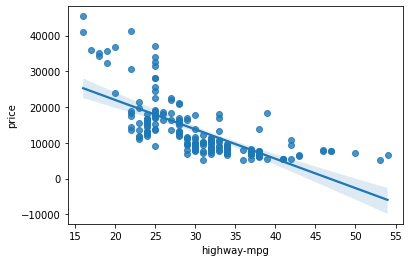

In [18]:
sns.regplot(x="highway-mpg", y="price", data = df)

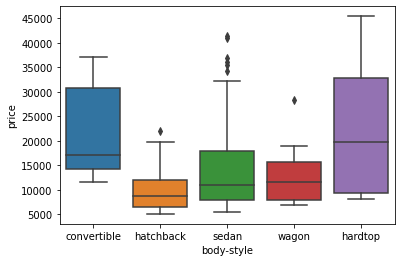

In [21]:
sns.boxplot(x="body-style", y="price", data = df)

In [26]:
#Lets determine the correlation coefficient and the p-value for significance

In [22]:
from scipy import stats

In [24]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])

In [25]:
pearson_coef, p_value

(-0.704692265058953, 1.7495471144476358e-31)

In [27]:
#We can see frpm the correlation coefficient that the relation b/w highway-mpg and price is negatively linear and strong
#and the p<0.001 which is significant.

In [28]:
#LETS DEVELOP OUR MODEL


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm

LinearRegression()

In [32]:
#How could "highway-mpg" help us predict car price?

In [33]:
X = df[['highway-mpg']]
Y = df['price']

In [34]:
lm.fit(X,Y)

LinearRegression()

In [35]:
Yhat=lm.predict(X)

In [38]:
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [40]:
#Lets get the intercept and slope in our linear regression model

In [41]:
lm.intercept_

38423.3058581574

In [44]:
lm.coef_

array([-821.73337832])

In [45]:
#   Price = 38423.31 - 821.73 x highway-mpg

In [46]:
#Lets also train a model for engine size and price.

In [51]:
X1 = df[["engine-size"]]
Y1 = df[["price"]]

In [48]:
lm1 = LinearRegression()

In [52]:
lm1.fit(X1,Y1)

LinearRegression()

In [54]:
Ye = lm1.predict(X1)

In [55]:
lm1.intercept_

array([-7963.33890628])

In [56]:
lm1.coef_

array([[166.86001569]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


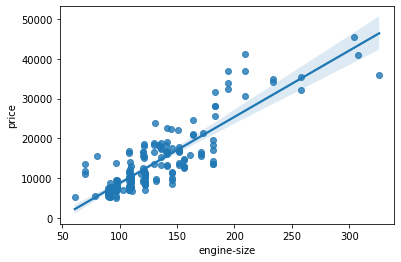

In [57]:
sns.regplot(df["engine-size"], df["price"], data = df)

In [58]:
# Price = -7963.33 + 166.86 * engine-size

In [60]:
#MODEL FOR PREDICTING CAR PRICE USING ONE(1) VARIABLE NOW DEVELOPED

In [61]:
#LETS PREDICT USING MORE THAN ONE(1) VARIABLE - MULTIPLE LINEAR REGRESSION

In [62]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [63]:
lm.fit(Z, df["price"])

LinearRegression()

In [64]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [65]:
lm.intercept_

-15806.62462632922

In [66]:
# Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [67]:
#MODEL EVALUATION
#To choose the best one
# The first test is to use a regression plot  to visualize the fit of our model
#We check the strength of the correlation, as well as the direction (positive or negative correlation).
#If it is weak, then the model isnt a good model for prediction

(0.0, 48161.18407381144)

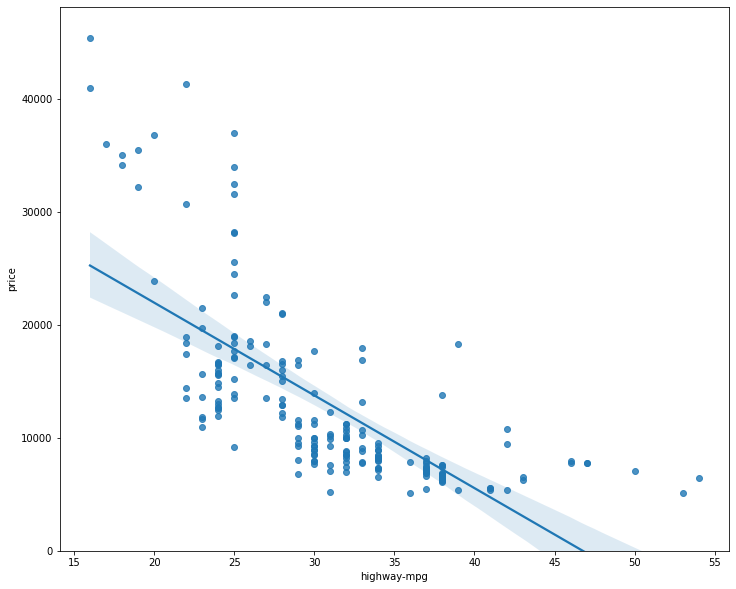

In [68]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


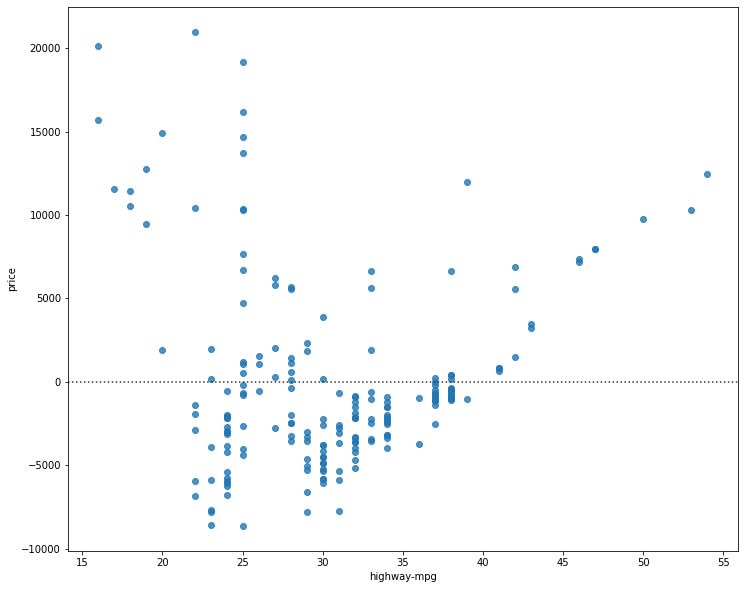

In [70]:
#RESIDUAL PLOT
#the next test is to check the residuals. The variance from the regression line
#If the points in a residual plot are randomly spread out around the x-axis, 
#then a linear model is appropriate for the data.

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [72]:
#We can see from this residual plot that the residuals are not randomly spread around the x-axis, 
#leading us to believe that maybe a non-linear model is more appropriate for this data.

In [73]:
#MULTIPLE LINEAR REGRESSION MODEL EVALUATION
#We look at a distribution plot

In [78]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


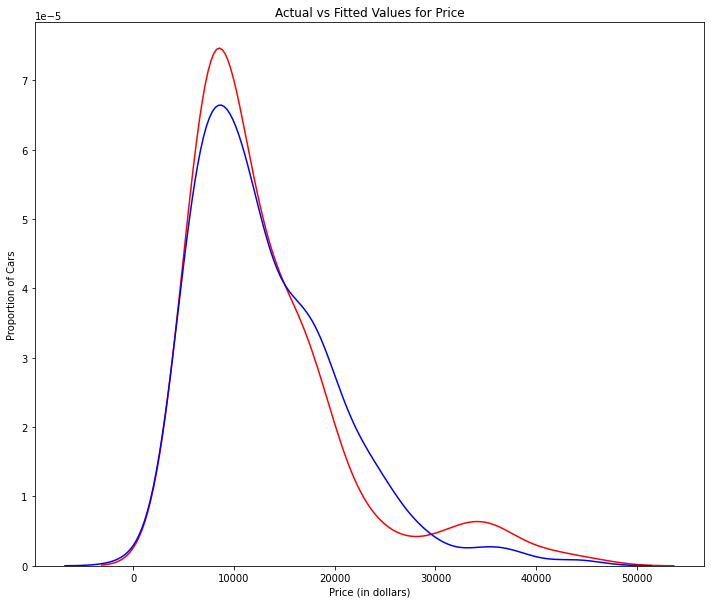

In [79]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


In [80]:
#We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.